# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [194]:
# 1) import the pandas library as pd
import pandas as pd

In [195]:
# 2) import the csv file into a variable called df
df=pd.read_csv('./Bertrand-physiodata.csv')

In [196]:
# 3) print the column names, just to make 
# sure that it matches what we have above
df.columns
print('hello')

hello


In [197]:
# 4) use the head() function to check your data
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [198]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
333871,2.0,9/11/18 09:55,1.536674e+09,-2.74,NaN,NaN,NaN,NaN,NaN,NaN
333872,2.0,9/11/18 09:55,1.536674e+09,-2.11,NaN,NaN,NaN,-43.0,15.0,44.0
333873,2.0,9/11/18 09:55,1.536674e+09,-1.64,NaN,NaN,NaN,NaN,NaN,NaN
333874,2.0,9/11/18 09:55,1.536674e+09,-1.48,NaN,NaN,NaN,-42.0,15.0,44.0
333875,NaN,NaN,NaN,-1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# 6) use the info() function to inspect your data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [200]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?

# Most of the other measures have similar sampling frequency, such as tags, real time, unix time
# The sampling frequency of HR is onece per second
# The sampling frequency of ACC_x ACC_y ACC_z is approximately 32 times per second

# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [201]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
import matplotlib.pyplot as plt
%matplotlib inline

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

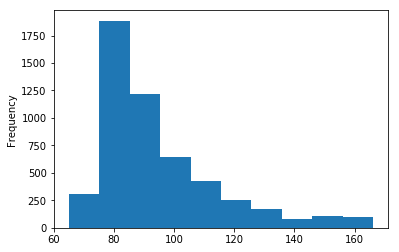

In [202]:
# 9) produce a histogram of the heart rate data; what can you say from it?

df['HR'].plot(kind='hist')
plt.show()
# The histogram is right-skewed. People's heart rate is mostly 80, followed by 90, and so on.

[]

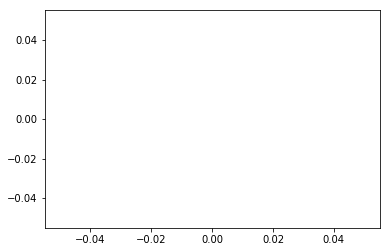

In [203]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):
plt.plot(x=df['real time'], y=df['HR'])

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: real time is Series of string
- reason 2: the type of real time is object
- reason 3: There are missing values

After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

In [204]:
# 12) Fix your dataframe using the link above: 
df = df.dropna()


### Now let's look at the electrodermal activity data (EDA)

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

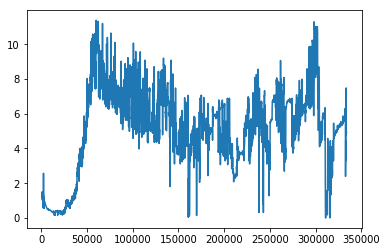

In [205]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data
df['EDA'].plot()


Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

In [206]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3
datetime =  pd.Series(df['real time'])
datetime = datetime.astype(str)
datetime.head()
realtime = pd.to_datetime(datetime, format='%m/%d/%y %H:%M')
df['real time'] = realtime

In [207]:
# 15) print the mean and median values of the EDA data; explain how they are different
print(df['EDA'].mean())
print(df['EDA'].median())

#the median is larger than the mean, which may imply the data is skewed to the left

5.187734843906185
5.329635


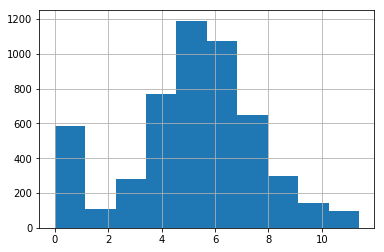

In [208]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?
df['EDA'].hist()
#kind of, but in the histogram, the outliers on the left pull mean down.

### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [211]:
# 17) filter both the EDA and HR values to keep the non-null rows:
df1 = df.loc[:,['EDA','HR']]

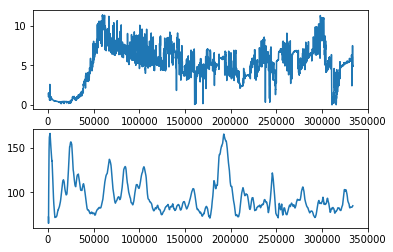

In [212]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
fig, axes=plt.subplots(nrows=2,ncols=1)
df1['EDA'].plot(ax=axes[0])
df1['HR'].plot(ax=axes[1])

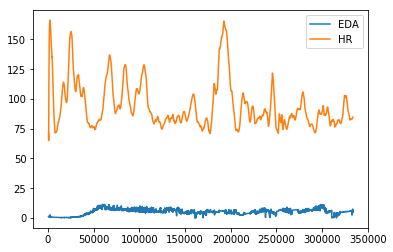

In [213]:
# 19) plot EDA and HR on the same graph; what went wrong?
df1.plot()
#the yrange of EDA is too small to be shown

In [214]:
# 20) normalize the HR and EDA columns using your favorite normalization strategy
# Hint: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas
df1 = (df1 - df1.mean())/(df1.max()-df1.min())

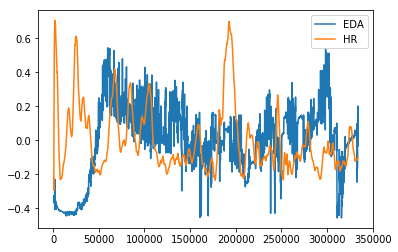

In [215]:
# 21) plot EDA and HR on the same graph; does the result look better?
df1.plot()
#Yes

In [216]:
# 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA?

#EDA has more frequenct change than HR
#I don't think the there is a strong agreement between HR and EDA

**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [217]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()

,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-11-09 08:28:00,0.0,1.536669e+09,0.00,NaN,0.000000,33.31,-50.0,7.0,28.0
2018-11-09 08:28:00,0.0,1.536669e+09,-0.05,NaN,0.836457,33.31,-32.0,64.0,27.0
2018-11-09 08:28:00,0.0,1.536669e+09,6.20,NaN,1.183860,33.31,-14.0,57.0,50.0
2018-11-09 08:28:00,0.0,1.536669e+09,22.90,NaN,1.167277,33.31,-22.0,52.0,24.0
2018-11-09 08:28:00,0.0,1.536669e+09,93.76,NaN,1.278719,33.31,-17.0,53.0,27.0


### Down sampling

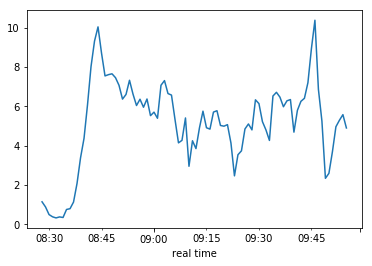

In [245]:
# 23) Use the instruction from datacamp to resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7
df2 = filtered_df['EDA'].resample('min').mean()
df2.plot()

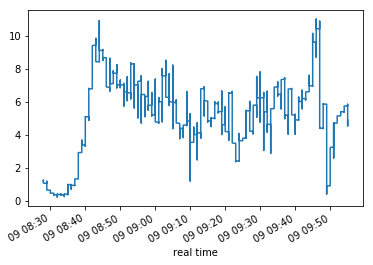

In [251]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window
df2 = filtered_df['EDA'].rolling(window=60).mean()
df2.plot()

In [ ]:
# 25) What is the difference between rolling() and resample()? Why do the graphs look different?
#rolling() is supposed to highlight long-term trends. In this case, I am not sure whether I correctly set the window=60 arguement

## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

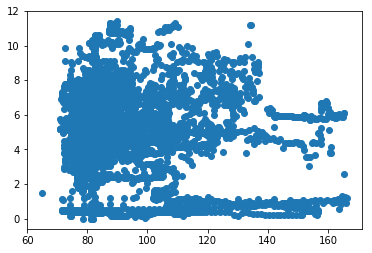

In [252]:
# 26) create a scatter plot between HR and EDA:
plt.scatter(x=filtered_df['HR'],y=filtered_df['EDA'])

In [263]:
# 27) compute pearson's correlation between the HR and EDA data
df3=filtered_df.loc[:,['HR','EDA']]
df3.corr(method='pearson')

,HR,EDA
HR,1.000000,-0.138619
EDA,-0.138619,1.000000


In [24]:
# 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?
#The correlation of HR and EDA is -0.14. There is a negative small correlation between HR and EDA.
#We do not konw whether there is a linear relationship based on the correlation.